In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# read in data
data = pd.read_csv('D:\\PythonProjects\\DataSets\\avocado.csv',parse_dates = ['Date'])

In [3]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
0,0,2015-12-27,1.33,64236.62,1036.74,54454.85,48.16,8696.87,8603.62,93.25,0.0,conventional,2015,Albany
1,1,2015-12-20,1.35,54876.98,674.28,44638.81,58.33,9505.56,9408.07,97.49,0.0,conventional,2015,Albany
2,2,2015-12-13,0.93,118220.22,794.70,109149.67,130.50,8145.35,8042.21,103.14,0.0,conventional,2015,Albany
3,3,2015-12-06,1.08,78992.15,1132.00,71976.41,72.58,5811.16,5677.40,133.76,0.0,conventional,2015,Albany
4,4,2015-11-29,1.28,51039.60,941.48,43838.39,75.78,6183.95,5986.26,197.69,0.0,conventional,2015,Albany


In [4]:
data = data.sort_values(['region','type','Date'])

In [5]:
data.head()

,Unnamed: 0,Date,AveragePrice,Total Volume,4046,4225,4770,Total Bags,Small Bags,Large Bags,XLarge Bags,type,year,region
51,51,2015-01-04,1.22,40873.28,2819.50,28287.42,49.90,9716.46,9186.93,529.53,0.0,conventional,2015,Albany
50,50,2015-01-11,1.24,41195.08,1002.85,31640.34,127.12,8424.77,8036.04,388.73,0.0,conventional,2015,Albany
49,49,2015-01-18,1.17,44511.28,914.14,31540.32,135.77,11921.05,11651.09,269.96,0.0,conventional,2015,Albany
48,48,2015-01-25,1.06,45147.50,941.38,33196.16,164.14,10845.82,10103.35,742.47,0.0,conventional,2015,Albany
47,47,2015-02-01,0.99,70873.60,1353.90,60017.20,179.32,9323.18,9170.82,152.36,0.0,conventional,2015,Albany


In [6]:
volume = data.groupby('Date')['Total Volume'].sum()

In [7]:
volume

Date
2015-01-04    8.467434e+07
2015-01-11    7.855581e+07
2015-01-18    7.838878e+07
2015-01-25    7.646628e+07
2015-02-01    1.194532e+08
                  ...     
2018-02-25    1.092314e+08
2018-03-04    1.118449e+08
2018-03-11    1.114652e+08
2018-03-18    1.136740e+08
2018-03-25    1.182690e+08
Name: Total Volume, Length: 169, dtype: float64

In [8]:
#Scalecast installation
#pip install --upgrade scalecast   
from scalecast.Forecaster import Forecaster

In [9]:
f = Forecaster(
    y = volume ,
    current_dates = volume.index,
    future_dates = 13,
)


In [10]:
f

Forecaster(
    DateStartActuals=2015-01-04T00:00:00.000000000
    DateEndActuals=2018-03-25T00:00:00.000000000
    Freq=W-SUN
    N_actuals=169
    ForecastLength=13
    Xvars=[]
    Differenced=0
    TestLength=1
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

<AxesSubplot:xlabel='Date', ylabel='Values'>

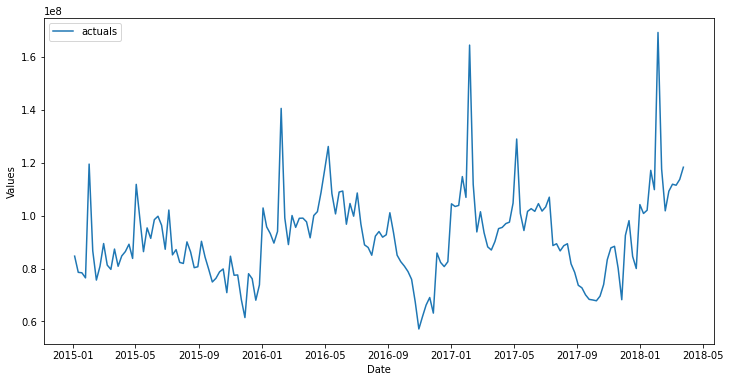

In [11]:
#Exploring Data

f.plot()
#plt.show()

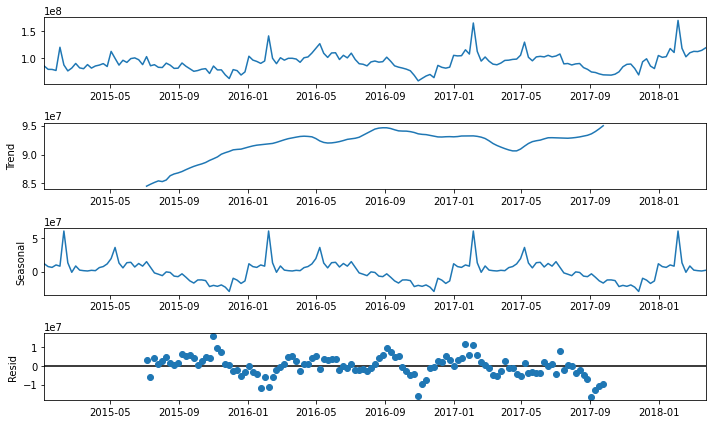

In [12]:
plt.rc("figure",figsize=(10,6))


f.seasonal_decompose().plot()

plt.show()

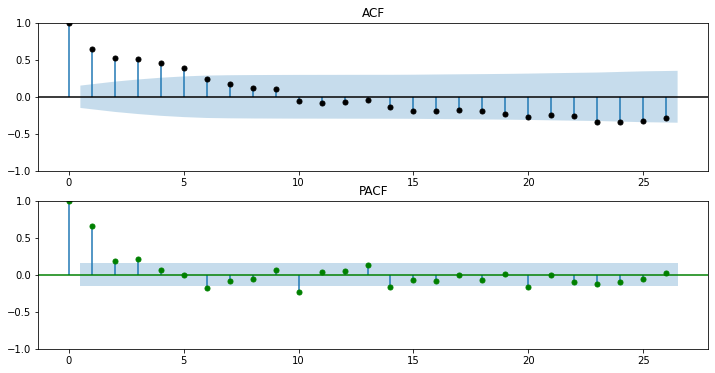

In [13]:
figs, axs = plt.subplots(2, 1,figsize=(12,6))
f.plot_acf(ax=axs[0],title='ACF',lags=26,color='black')
f.plot_pacf(ax=axs[1],title='PACF',lags=26,color='green')
plt.show()

In [14]:
f.set_test_length(.15)  # model will be tested on the last 15% of the observed values in the dataset.

In [15]:
f.add_time_trend()

In [16]:
f.add_seasonal_regressors('week',raw=False,sincos=True)

In [17]:
f.add_ar_terms(13)

In [18]:
f

Forecaster(
    DateStartActuals=2015-01-04T00:00:00.000000000
    DateEndActuals=2018-03-25T00:00:00.000000000
    Freq=W-SUN
    N_actuals=169
    ForecastLength=13
    Xvars=['t', 'weeksin', 'weekcos', 'AR1', 'AR2', 'AR3', 'AR4', 'AR5', 'AR6', 'AR7', 'AR8', 'AR9', 'AR10', 'AR11', 'AR12', 'AR13']
    Differenced=0
    TestLength=25
    ValidationLength=1
    ValidationMetric=rmse
    ForecastsEvaluated=[]
    CILevel=0.95
    BootstrapSamples=100
    CurrentEstimator=None
    GridsFile=Grids
)

In [19]:
f.set_estimator('mlr')
f.manual_forecast(dynamic_testing=13)

f.set_estimator('lasso')
f.manual_forecast(alpha=0.2,dynamic_testing=13)

f.set_estimator('ridge')
f.manual_forecast(alpha=0.2,dynamic_testing=13)

f.set_estimator('elasticnet')
f.manual_forecast(alpha=0.2,l1_ratio=0.5,dynamic_testing=13)

f.set_estimator('sgd')
f.manual_forecast(alpha=0.2,l1_ratio=0.5,dynamic_testing=13)

##### 95 % confidence interval
The 95% confidence interval is a range of values that you can be 95% certain contains the true mean of the population. 
As the sample size increases, the range of interval values will narrow, meaning that you know that mean with much more accuracy compared with a smaller sample.

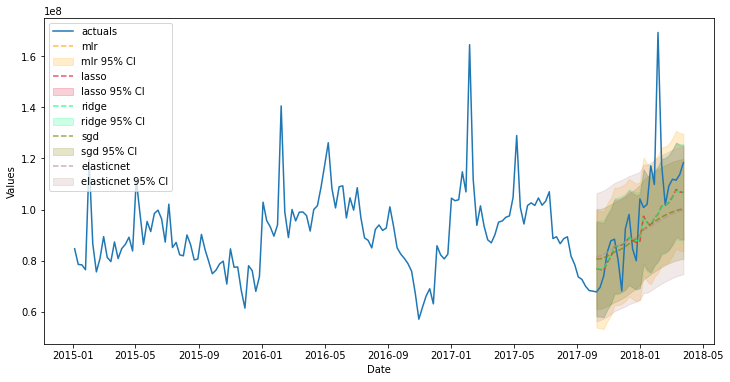

In [22]:
#f.plot_test_set(ci=True,models=['mlr',],order_by='LevelTestSetMAPE')
# f.plot_test_set(ci=True,models=['mlr',])
# plt.show()

f.plot_test_set(ci=True,models=['mlr','lasso','ridge','elasticnet','sgd'],order_by='LevelTestSetMAPE')
plt.show()


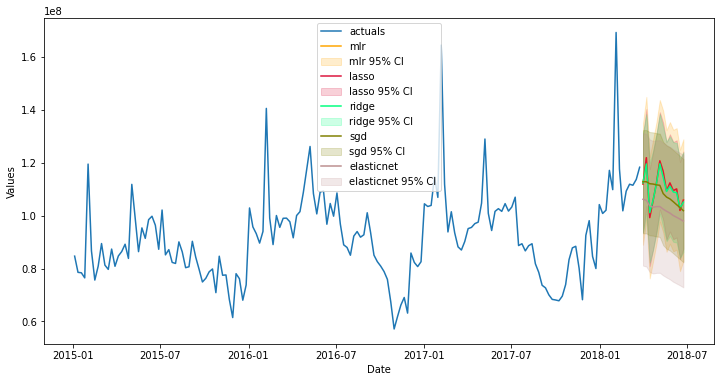

In [21]:
#f.plot(ci=True,models=['mlr'],order_by='LevelTestSetMAPE')
# f.plot(ci=True,models=['mlr'])
# plt.show()

f.plot(ci=True,models=['mlr','lasso','ridge','elasticnet','sgd'],order_by='LevelTestSetMAPE')
plt.show()